Anita Soroush

# About Dataset
This project is a sentiment analysis of 50k movie reviews on Internet Movie Database (IMDB). This is a dataset for binary sentiment classification and each review has a label of "positive" or "negative".

the dataset is available on: [IMDB dataset of 50k movie reviews](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)


In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("/content/gdrive/MyDrive/IMDB_Dataset.csv")
dataset

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
dict(dataset["sentiment"].value_counts())

{'positive': 25000, 'negative': 25000}

# Preprocessing

In [5]:
dataset['sentiment'].replace({'positive':1, 'negative':0},inplace=True)

## Lower Casing

In [6]:
# 1: lowercasing:
def to_lower(text):
    return text.lower()
    
dataset['review'] = dataset['review'].apply(to_lower)

## Removing URLs

In [7]:
# removing URLs:
def remove_url(text):
    re_url = re.compile('https?://\S+|www\.\S+')
    return re_url.sub('', text)
    
dataset['review'] = dataset['review'].apply(remove_url)

## Removing Punctuations

In [8]:
# removing punctuations:
import string
exclude = string.punctuation
def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))
    
dataset['review'] = dataset['review'].apply(remove_punc)

## Removing Stopwords

In [9]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [10]:
# removing stopwords:
from nltk.corpus import stopwords
stopwords_english = stopwords.words('english')
def remove_stopwords(text):
    new_text = []
    for word in text.split():
        if word in stopwords_english:
            continue
        else:
            new_text.append(word)
    return ' '.join(new_text)

dataset['review'] = dataset['review'].apply(remove_stopwords)

## Handling Imojies

In [11]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 4.0 MB/s 
  Created wheel for emoji: filename=emoji-2.1.0-py3-none-any.whl size=212392 sha256=74d85062a60a48ae210d16b4f6e249234d8310fbc0b47bdec2af6ff052390319
  Stored in directory: /root/.cache/pip/wheels/77/75/99/51c2a119f4cfd3af7b49cc57e4f737bed7e40b348a85d82804
Successfully built emoji


In [12]:
# handling emogies:
import emoji
def remove_emojies(text):
    return emoji.demojize(text)

dataset['review'] = dataset['review'].apply(remove_emojies)

In [13]:
dataset

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production br br filming tech...,1
2,thought wonderful way spend time hot summer we...,1
3,basically theres family little boy jake thinks...,0
4,petter matteis love time money visually stunni...,1
...,...,...
49995,thought movie right good job wasnt creative or...,1
49996,bad plot bad dialogue bad acting idiotic direc...,0
49997,catholic taught parochial elementary schools n...,0
49998,im going disagree previous comment side maltin...,0


## Stemming 
stemming is to convert words to their root form (like for ‘playing’, ‘played’ there will be only one token after processing: ‘play’ which is root word)

In [14]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def perform_stemming(text):
    new_text = [ps.stem(word) for word in text.split()]
    return ' '.join(new_text)

dataset['review'] = dataset['review'].apply(remove_emojies)

# Train-Test Split

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset['review'], dataset['sentiment'],test_size=0.2,random_state=5)

# TF-IDF Vectorizer
tf–idf means **Term-Trequency** times **Inverse Document-Frequency**:

> **TF(t)** = (Number of times term t appears in a document) / (Total number of terms in the document)

> **IDF(t)** = log_e(Total number of documents / Number of documents with term t in it)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features = 10000) #max_features = 10000 builds a vocabulary that only considers the top 10000 max_features ordered by term frequency across the corpus.
x_train = tfidf_vectorizer.fit_transform(x_train)
x_train = x_train.toarray()
x_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.03179443, ..., 0.05033325, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# Building Models
I use 3 different classifiers:
- Logistic Regression
- Random Forest Classifier
- Decision Tree Classifier

In [20]:
from sklearn import metrics
import matplotlib.pyplot as plt

def fit_and_prediction(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('Accuracy Score : ',metrics.accuracy_score(y_test, y_pred))
    print('F1 Score : ',metrics.f1_score(y_test, y_pred, average='weighted'))
    cm = metrics.confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()

Before building the model and testing we should transform x_test using the tf-idf vectorizer that is built based on x_test.

In [18]:
x_test = tfidf_vectorizer.transform(x_test)
x_test = x_test.toarray()

## Logistic Regression

Accuracy Score :  0.8941
F1 Score :  0.8940669192979381


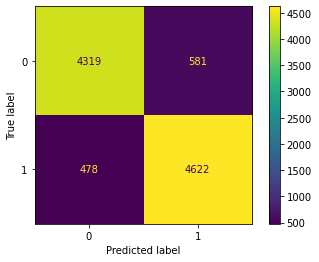

In [21]:
from sklearn.linear_model import LogisticRegression
fit_and_prediction(LogisticRegression(), x_train, x_test, y_train, y_test)

## Random Forest Classifier

Accuracy Score :  0.851
F1 Score :  0.8510043865712296


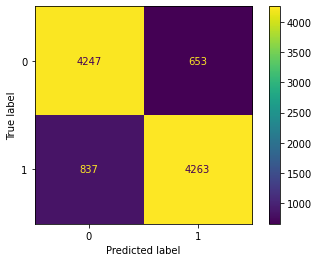

In [22]:
from sklearn.ensemble import RandomForestClassifier
fit_and_prediction(RandomForestClassifier(), x_train, x_test, y_train, y_test)

## Decision Tree Classifier

Accuracy Score :  0.7169
F1 Score :  0.7169177761193748


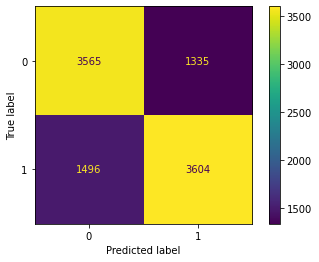

In [23]:
from sklearn.tree import DecisionTreeClassifier
fit_and_prediction(DecisionTreeClassifier(), x_train, x_test, y_train, y_test)

# Refrences:

- https://www.analyticsvidhya.com/blog/2021/08/text-preprocessing-techniques-for-performing-sentiment-analysis/
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
